In [1]:
# 🚗 CARSIGHT: Indian Car Sales Analytics 2024 

# A comprehensive analytics framework for analyzing car sales trends in India, focusing on manufacturer performance, segment analysis, and seasonal patterns. This analysis provides insights into market dynamics and sales performance across different dimensions.

In [6]:
# Step 1: Import Required Libraries 📚

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [9]:
# Step 2: Load and Clean Data 📊

df = pd.read_excel (r"C:\Users\ch.avinash chowdary\Downloads\Car Sales India 2024.xlsx")

In [10]:
# Basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())

Dataset Shape: (87, 19)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     object 
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       86 non-null     float64
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     int64  
 18  YoY %      87 non-null     int64  
dtypes: float64(1), i

In [11]:
# Clean February column (convert to numeric)
df['February'] = pd.to_numeric(df['February'], errors='coerce')

In [12]:
# Handle missing values in June
df['June'].fillna(df['June'].mean(), inplace=True)

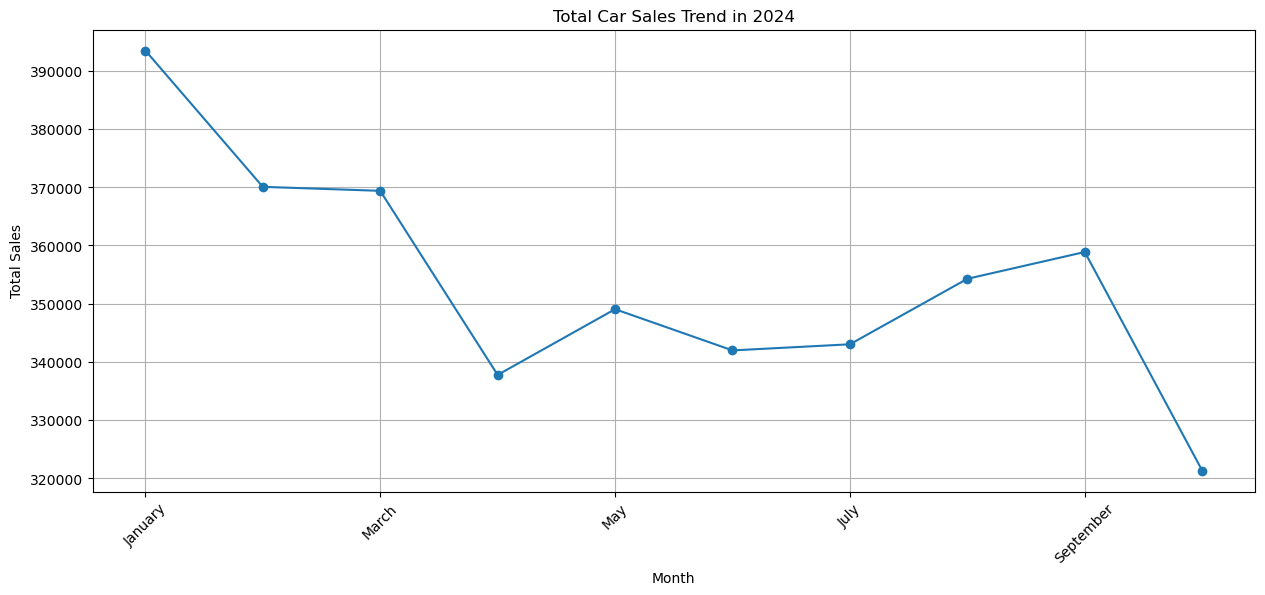

In [13]:
# Step 3: Monthly Sales Analysis 📈

# Get monthly columns (excluding non-month columns)
month_columns = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'December']  # Adjusted based on available columns

# Calculate monthly sales totals
monthly_sales = df[month_columns].sum()

# Plot monthly sales trend
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Car Sales Trend in 2024')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

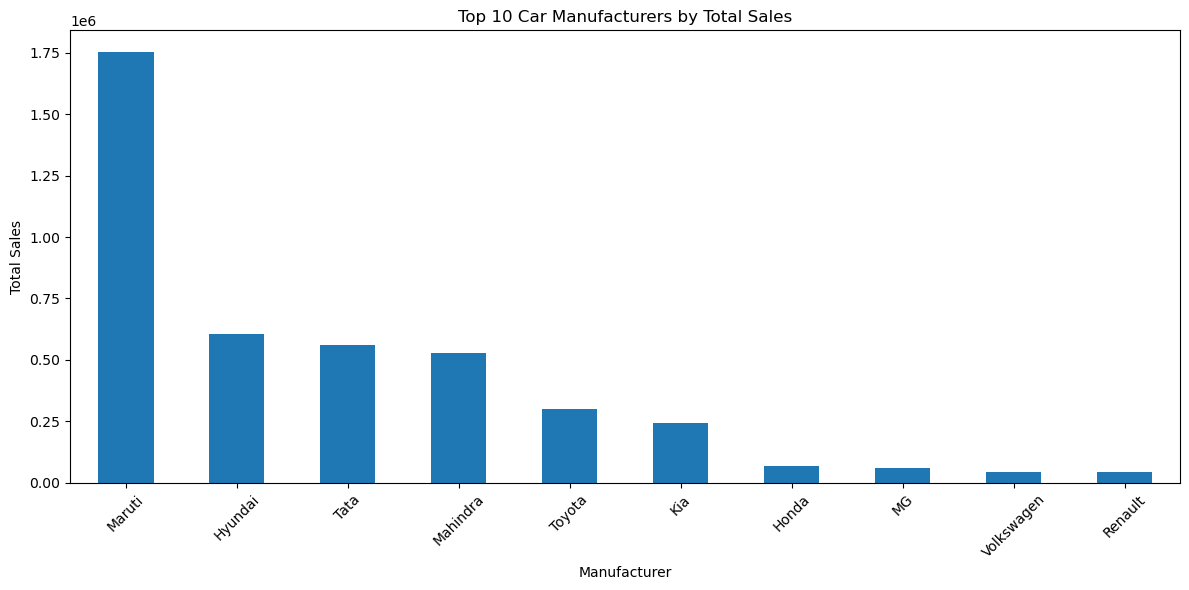

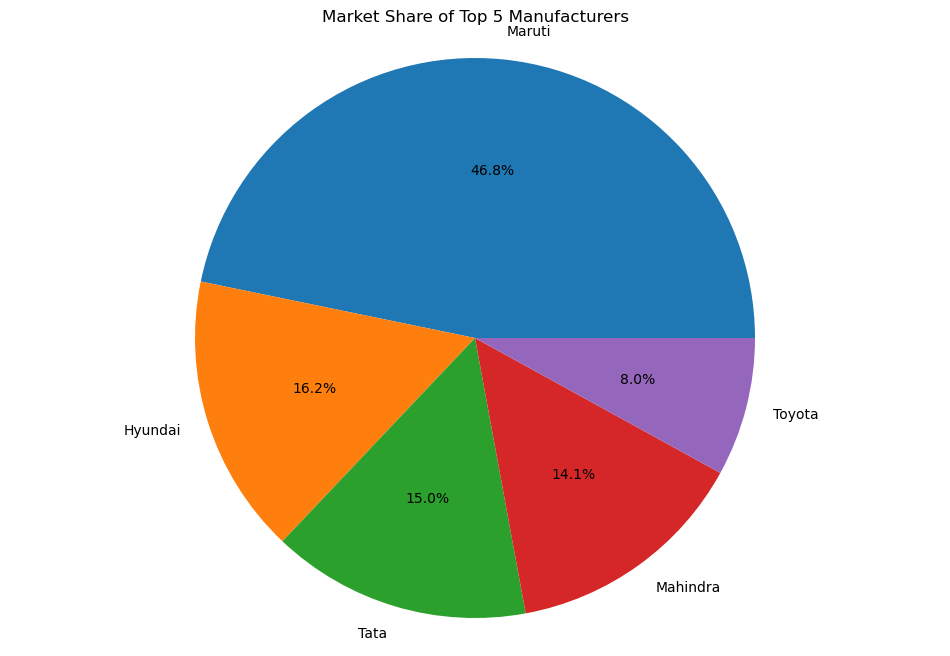

In [14]:
# Step 4: Manufacturer Analysis 🏢

# Group by manufacturer
manufacturer_sales = df.groupby('Make')['Total'].sum().sort_values(ascending=False)

# Plot top 10 manufacturers
plt.figure(figsize=(12, 6))
manufacturer_sales.head(10).plot(kind='bar')
plt.title('Top 10 Car Manufacturers by Total Sales')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Market share analysis
plt.figure(figsize=(12, 8))
plt.pie(manufacturer_sales.head(5), labels=manufacturer_sales.head(5).index, autopct='%1.1f%%')
plt.title('Market Share of Top 5 Manufacturers')
plt.axis('equal')
plt.show()

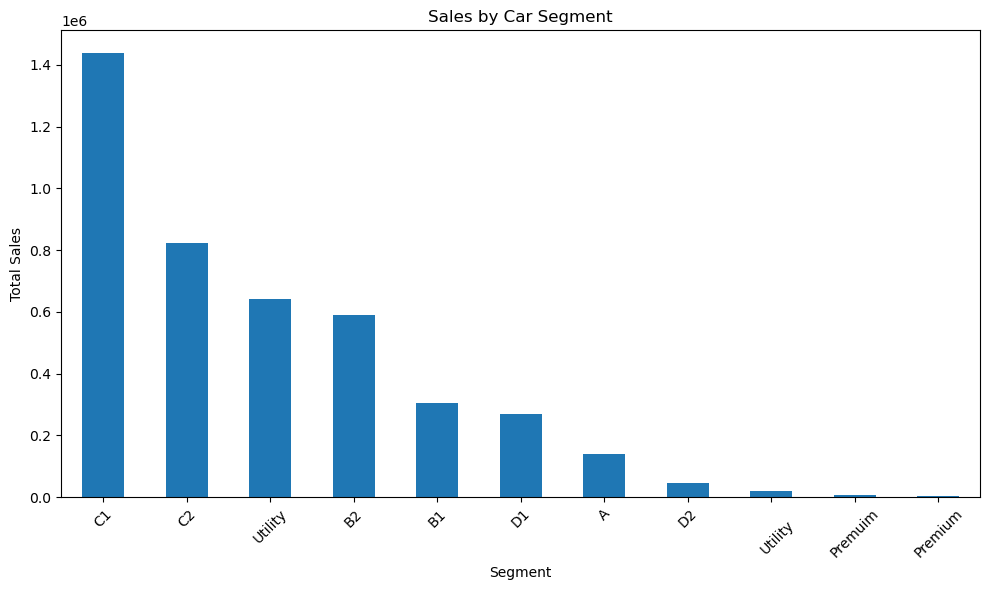

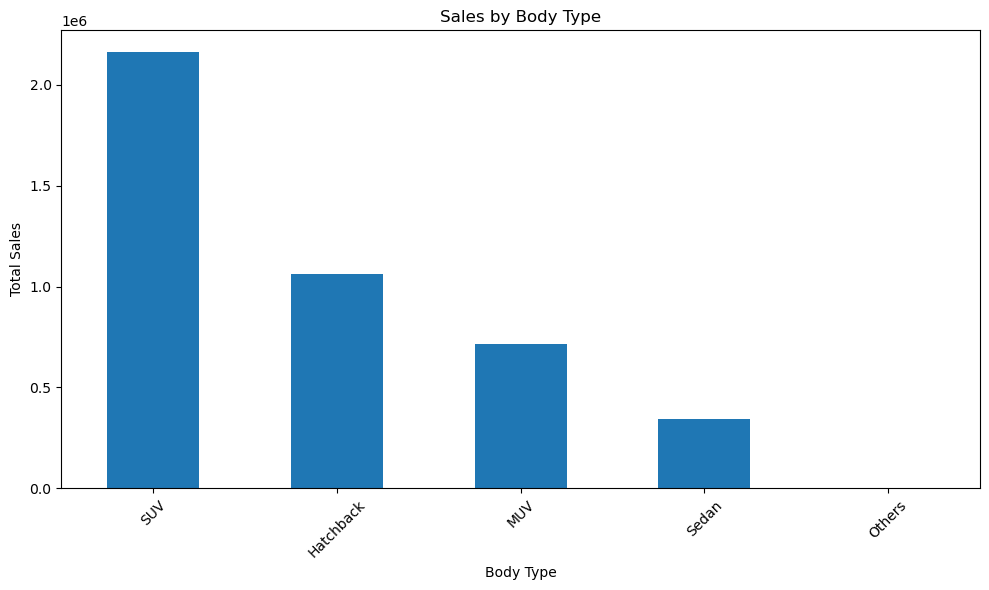

In [15]:
# Step 5: Segment and Body Type Analysis 🚘

# Analyze sales by segment
segment_sales = df.groupby('Segment')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
segment_sales.plot(kind='bar')
plt.title('Sales by Car Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze sales by body type
body_type_sales = df.groupby('Body Type')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
body_type_sales.plot(kind='bar')
plt.title('Sales by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

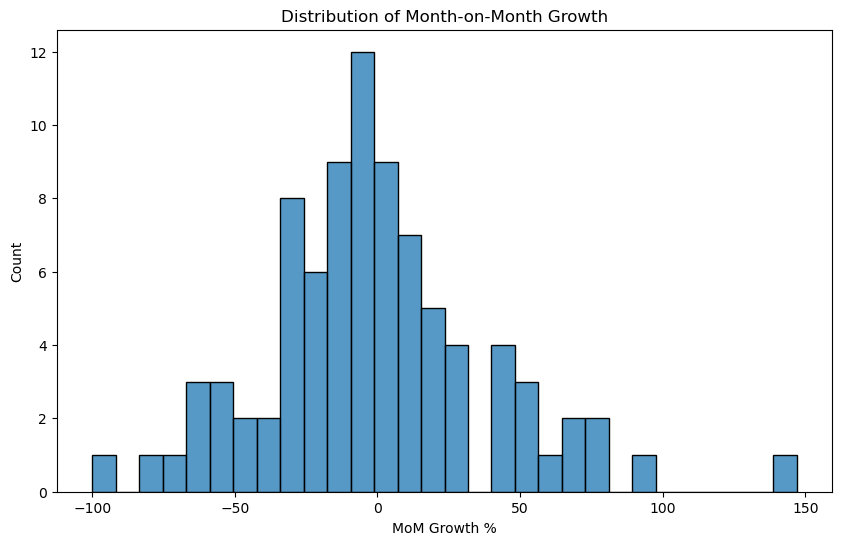

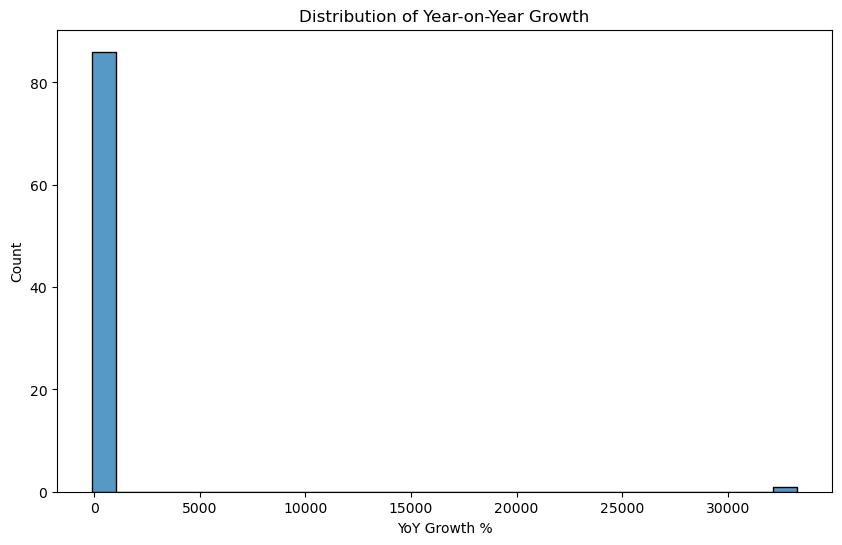

In [16]:
# Step 6: Growth Analysis 📊

# MoM Growth Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MoM %', bins=30)
plt.title('Distribution of Month-on-Month Growth')
plt.xlabel('MoM Growth %')
plt.show()

# YoY Growth Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YoY %', bins=30)
plt.title('Distribution of Year-on-Year Growth')
plt.xlabel('YoY Growth %')
plt.show()

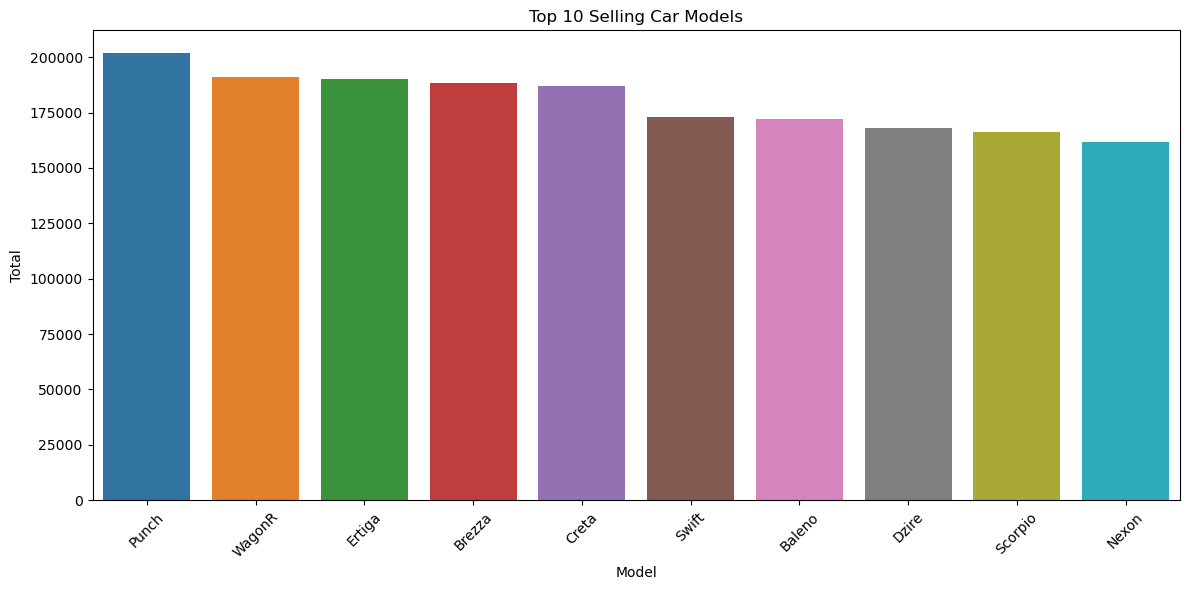


Most Consistent Sellers (Lower CV indicates more consistent sales):
        Make                          Model   Total  Coefficient_of_Variation
40    Maruti                           Eeco  138705                  0.045402
29  Mahindra                        Scorpio  166364                  0.084756
17   Hyundai                          Venue  117819                  0.093294
41    Maruti                         Ertiga  190091                  0.098211
10   Hyundai                          Creta  186919                  0.099141
8    Hyundai                           Aura   55138                  0.100703
79    Toyota  Innova Crysta, Innova Hycross  106900                  0.103879
70      Tata                          Punch  202031                  0.107539
54        MG                         Hector   19639                  0.112140
36    Maruti                         Brezza  188160                  0.112695


In [17]:
# Step 7: Model Performance Analysis 🏆

# Top 10 selling models
top_models = df.nlargest(10, 'Total')[['Make', 'Model', 'Total']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x='Model', y='Total')
plt.title('Top 10 Selling Car Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales consistency analysis
df['Sales_StdDev'] = df[month_columns].std(axis=1)
df['Sales_Mean'] = df[month_columns].mean(axis=1)
df['Coefficient_of_Variation'] = df['Sales_StdDev'] / df['Sales_Mean']

# Most consistent sellers (low coefficient of variation)
consistent_sellers = df.nsmallest(10, 'Coefficient_of_Variation')[
    ['Make', 'Model', 'Total', 'Coefficient_of_Variation']]
print("\nMost Consistent Sellers (Lower CV indicates more consistent sales):")
print(consistent_sellers)

In [18]:
# Step 8: Summary Statistics 📑

summary_stats = {
    'Total Cars Sold': df['Total'].sum(),
    'Average Monthly Sales': df['Total'].sum() / len(month_columns),
    'Best Selling Month': monthly_sales.index[monthly_sales.argmax()],
    'Worst Selling Month': monthly_sales.index[monthly_sales.argmin()],
    'Market Leader': manufacturer_sales.index[0],
    'Most Popular Segment': segment_sales.index[0],
    'Most Popular Body Type': body_type_sales.index[0],
    'Average YoY Growth': df['YoY %'].mean()
}

# Print formatted summary statistics
for key, value in summary_stats.items():
    if isinstance(value, (int, float)):
        if key == 'Average YoY Growth':
            print(f"{key}: {value:.2f}%")
        else:
            print(f"{key}: {int(value):,}")
    else:
        print(f"{key}: {value}")

Total Cars Sold: 4284856
Average Monthly Sales: 428,485
Best Selling Month: January
Worst Selling Month: December
Market Leader: Maruti
Most Popular Segment: C1
Most Popular Body Type: SUV
Average YoY Growth: 398.86%


In [19]:
# 🚀 Found my analysis and notebook useful?

# Your feedback would mean the world!

# Your support fuels my drive to create even better insights! 🌟

In [21]:
# Thankyou!!!!